In [545]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [546]:
df_airbnb = pd.read_csv('../assets/UTS/airbnb.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Check Data Info

In [547]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

---

In [548]:
# Type
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [549]:
# Missing Value
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [550]:
# Jumlah Data
df_airbnb.shape

(48895, 16)

In [551]:
# Mean dari kolom price
df_airbnb['price'].mean()

152.7206871868289

In [552]:
# Median dari kolom price
df_airbnb['price'].median()

106.0

In [553]:
# Standard Deviation
std = df_airbnb['price'].std()
std


240.15416974718727

In [554]:
# Harga Minimal dari kolom price
print(df_airbnb['price'].min())
# Harga Maksimal dari kolom price
print(df_airbnb['price'].max())

0
10000


In [555]:
# Perbandingan antara Harga Maksimal dan Minimal
print(df_airbnb['price'].max() - df_airbnb['price'].min())

10000


Imputasi Nilai Hilang

In [556]:
df_airbnb['name'] = df_airbnb['name'].fillna('Unknown')
df_airbnb['host_name'] = df_airbnb['host_name'].fillna('Unknown')
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)
df_airbnb['has_reviews'] = np.where(df_airbnb['number_of_reviews'] > 0, 1, 0)
df_airbnb['last_review'] = df_airbnb['last_review'].fillna('No Review')

print("Nilai hilang setelah imputasi:")
print(df_airbnb.isnull().sum())

Nilai hilang setelah imputasi:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
has_reviews                       0
dtype: int64


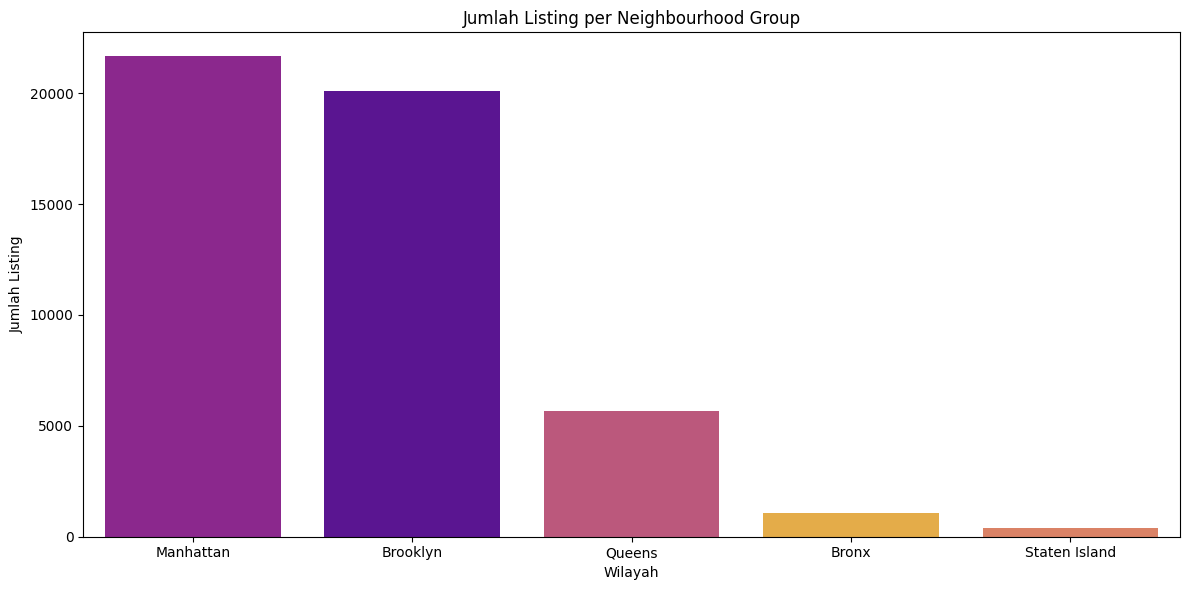

In [557]:
# Distribusi listing berdasarkan neighbourhood group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_airbnb, x='neighbourhood_group', order=df_airbnb['neighbourhood_group'].value_counts().index, palette='plasma', hue='neighbourhood_group', legend=False)
plt.title('Jumlah Listing per Neighbourhood Group')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Listing')
plt.tight_layout()
plt.show()

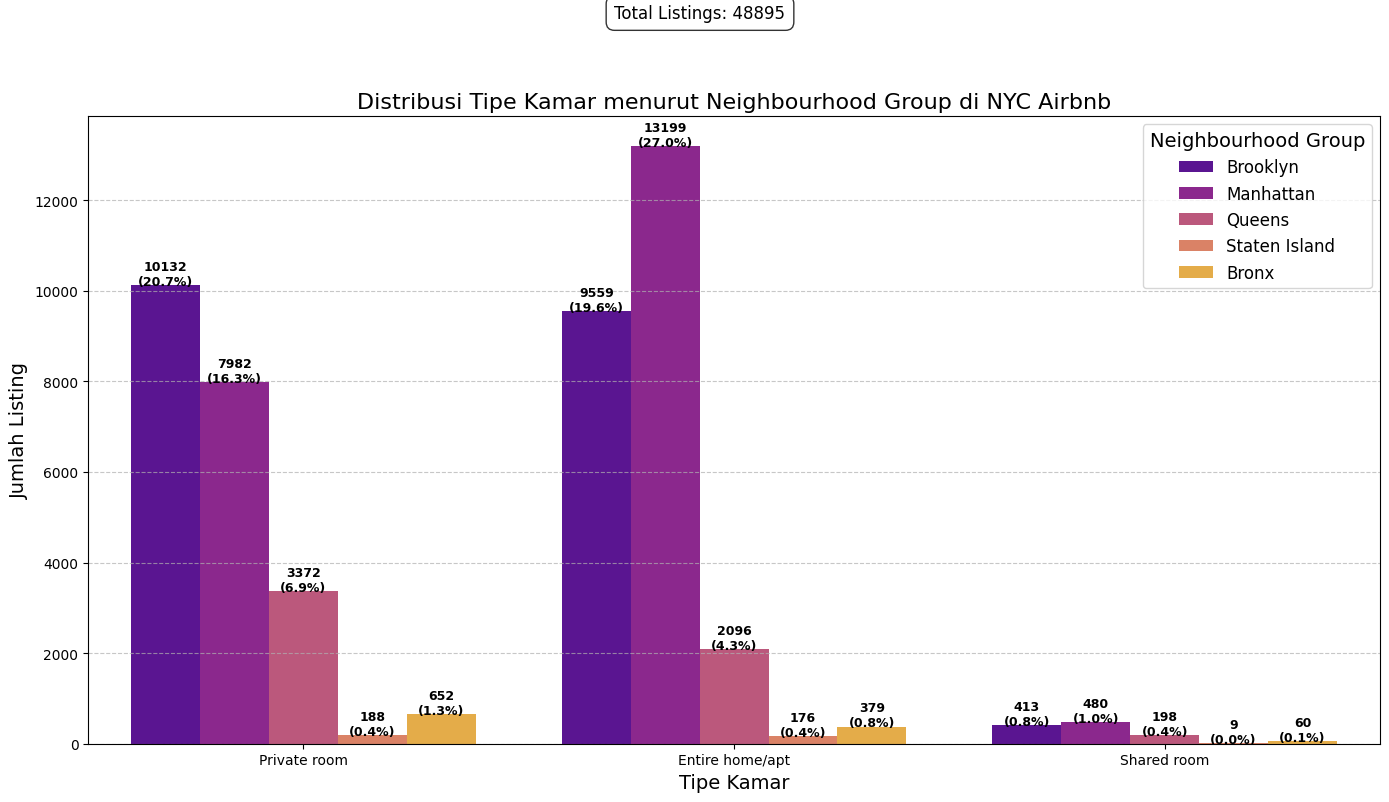

In [ ]:
# Distribusi tipe kamar berdasarkan neighbourhood group
plt.figure(figsize=(14, 8))

ax = sns.countplot(
    data=df_airbnb, 
    x='room_type', 
    hue='neighbourhood_group',
    palette='plasma',
    dodge=True
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribusi Tipe Kamar menurut Neighbourhood Group di NYC Airbnb', fontsize=16)
plt.xlabel('Tipe Kamar', fontsize=14)
plt.ylabel('Jumlah Listing', fontsize=14)
plt.legend(title='Neighbourhood Group', title_fontsize=14, fontsize=12)

total = len(df_airbnb)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2., 
            height + 5, 
            f'{int(height)}\n({height/total:.1%})', 
            ha='center',
            fontsize=9,
            fontweight='bold'
        )

summary_text = f"Total Listings: {len(df_airbnb)}"
plt.annotate(
    summary_text, 
    xy=(0.5, 0.98), 
    xycoords='figure fraction', 
    ha='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

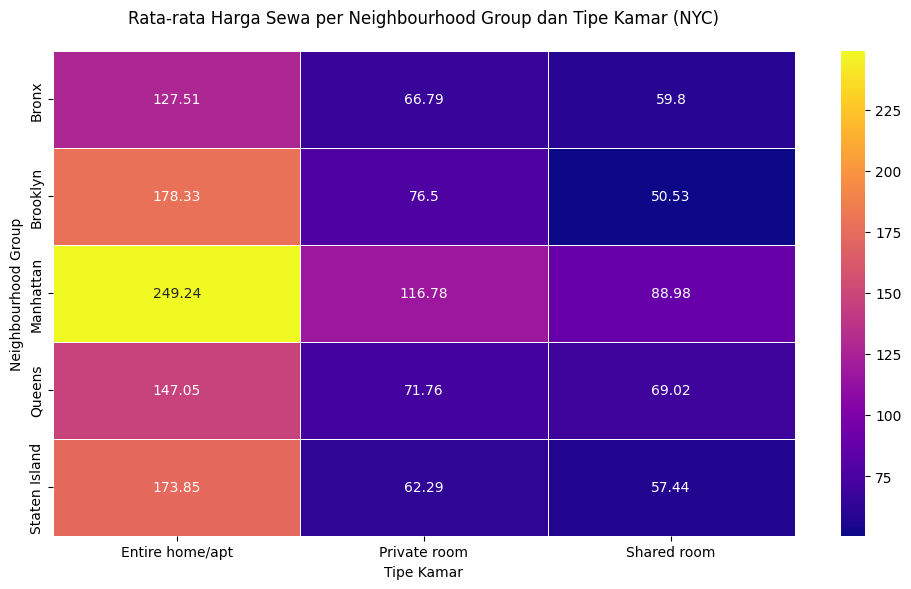

In [559]:
# Hitung rata-rata harga
grouped_df = df_airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

pivot_table = grouped_df.pivot(index='neighbourhood_group', columns='room_type', values='price').round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, 
            annot=True, 
            fmt="g",
            cmap="plasma",
            linewidths=.5,
            annot_kws={"size": 10})

plt.title("Rata-rata Harga Sewa per Neighbourhood Group dan Tipe Kamar (NYC)", pad=20)
plt.xlabel("Tipe Kamar")
plt.ylabel("Neighbourhood Group")
plt.xticks()
plt.tight_layout()
plt.show()

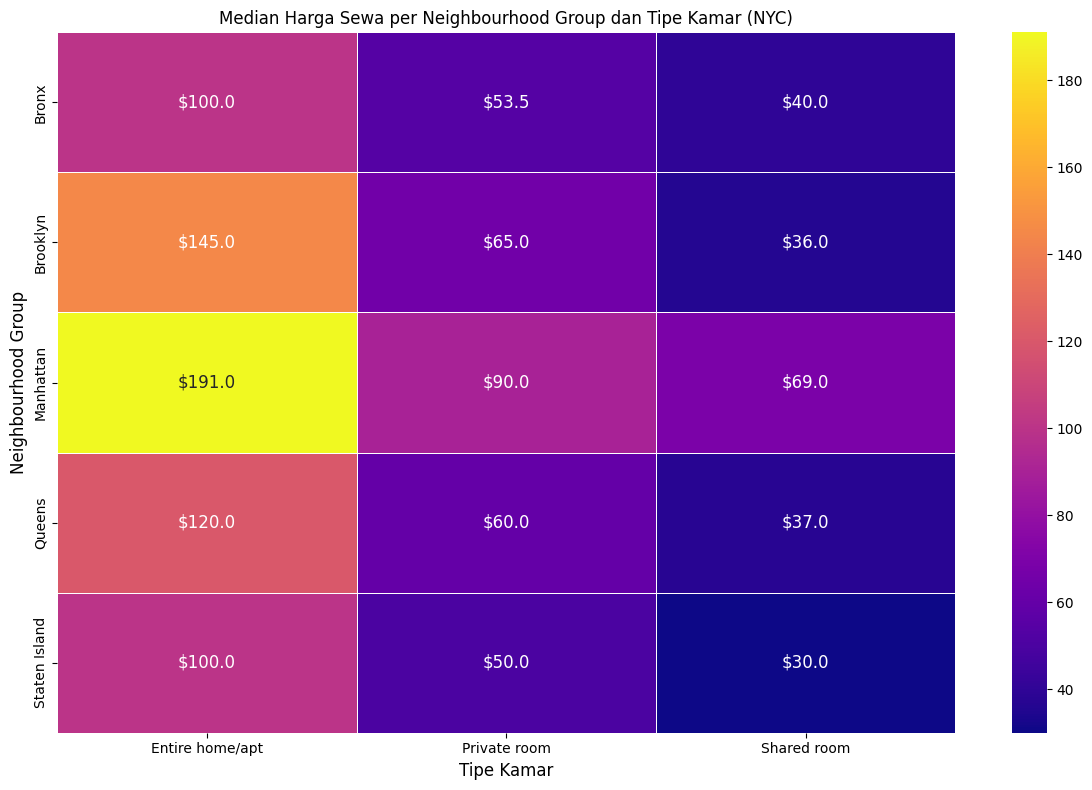

In [560]:
# Hitung median harga
median_df = df_airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].median().reset_index()
median_pivot = median_df.pivot(index='neighbourhood_group', columns='room_type', values='price').round(2)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(median_pivot, 
            annot=True, 
            fmt=".1f",
            cmap="plasma",
            linewidths=0.5,
            annot_kws={"size": 12})

for t in ax.texts:
    t.set_text(f"${t.get_text()}")

plt.title("Median Harga Sewa per Neighbourhood Group dan Tipe Kamar (NYC)")
plt.xlabel("Tipe Kamar", fontsize=12)
plt.ylabel("Neighbourhood Group", fontsize=12)
plt.tight_layout()
plt.show()

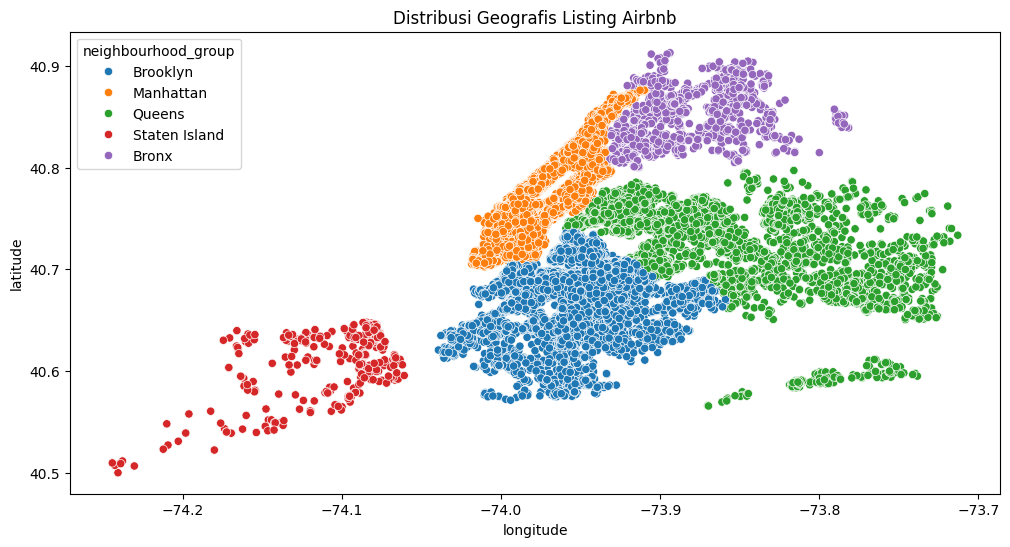

In [561]:
# Distribusi Geografis Listing
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_airbnb)
plt.title('Distribusi Geografis Listing Airbnb')
plt.show()

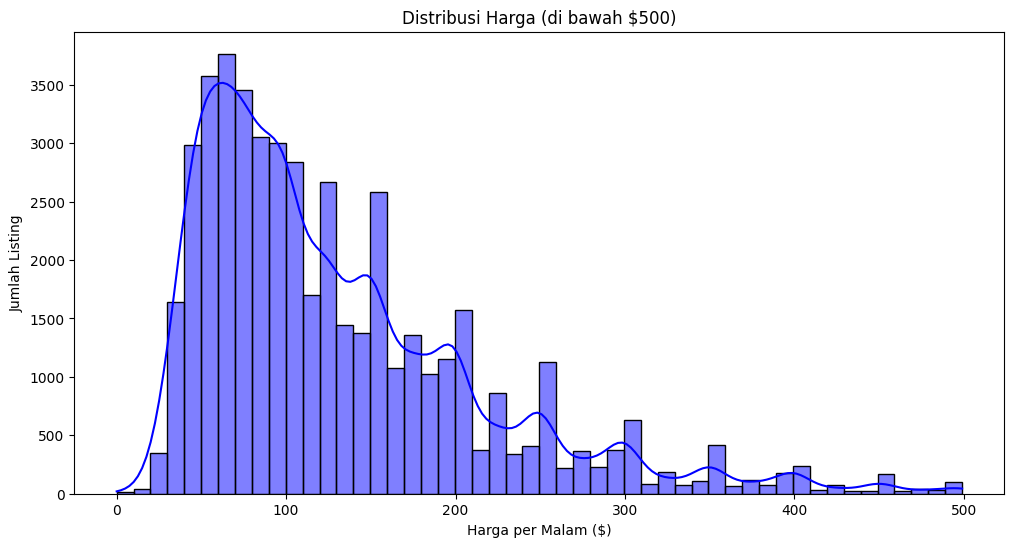

In [574]:
# Distribusi Harga per Malam
plt.figure(figsize=(12, 6))
sns.histplot(df_airbnb[df_airbnb['price'] < 500]['price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga (di bawah $500)')
plt.xlabel('Harga per Malam ($)')
plt.ylabel('Jumlah Listing')
plt.show()

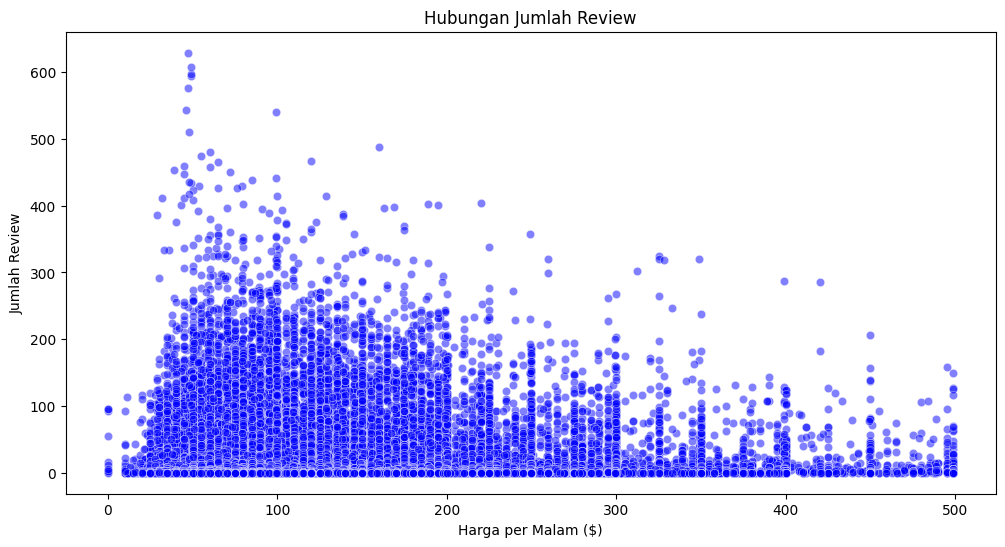

In [563]:
# Perbandingan Hubungan Jumlah Review dan Harga
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df_airbnb[df_airbnb['price'] < 500], alpha=0.5, color='blue')
plt.title('Hubungan Jumlah Review')
plt.xlabel('Harga per Malam ($)')
plt.ylabel('Jumlah Review')
plt.show()

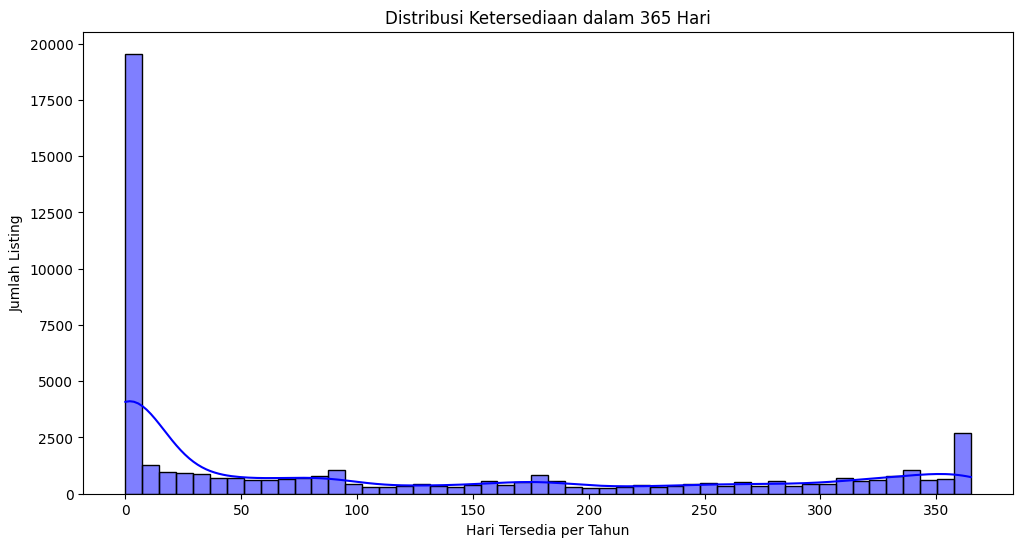

In [564]:
# Ketersediaan (Availability)
plt.figure(figsize=(12, 6))
sns.histplot(df_airbnb['availability_365'], bins=50, kde=True, color='blue')
plt.title('Distribusi Ketersediaan dalam 365 Hari')
plt.xlabel('Hari Tersedia per Tahun')
plt.ylabel('Jumlah Listing')
plt.show()

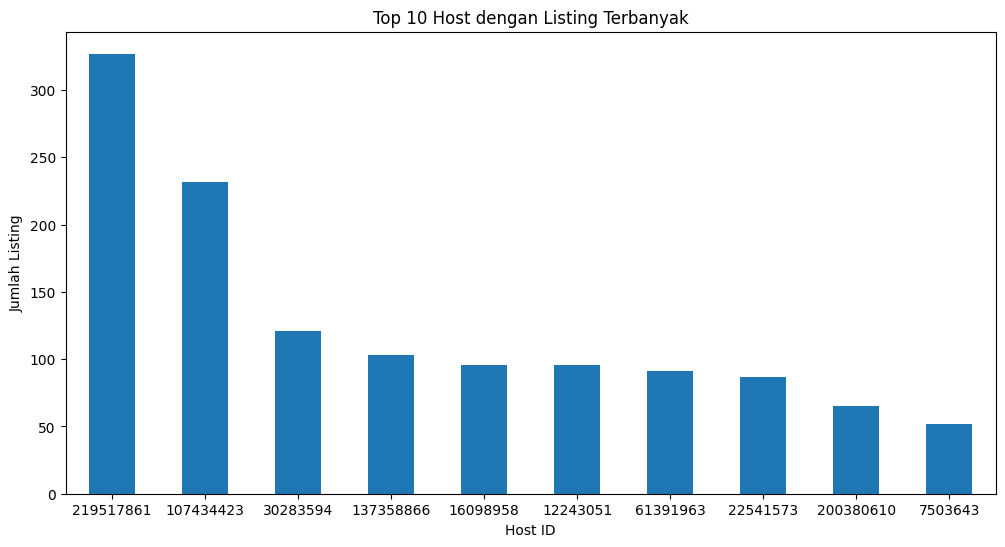

In [565]:
# Host Aktif dan Jumlah Listing
top_hosts = df_airbnb['host_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_hosts.plot(kind='bar')
plt.title('Top 10 Host dengan Listing Terbanyak')
plt.xlabel('Host ID')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=0)
plt.show()

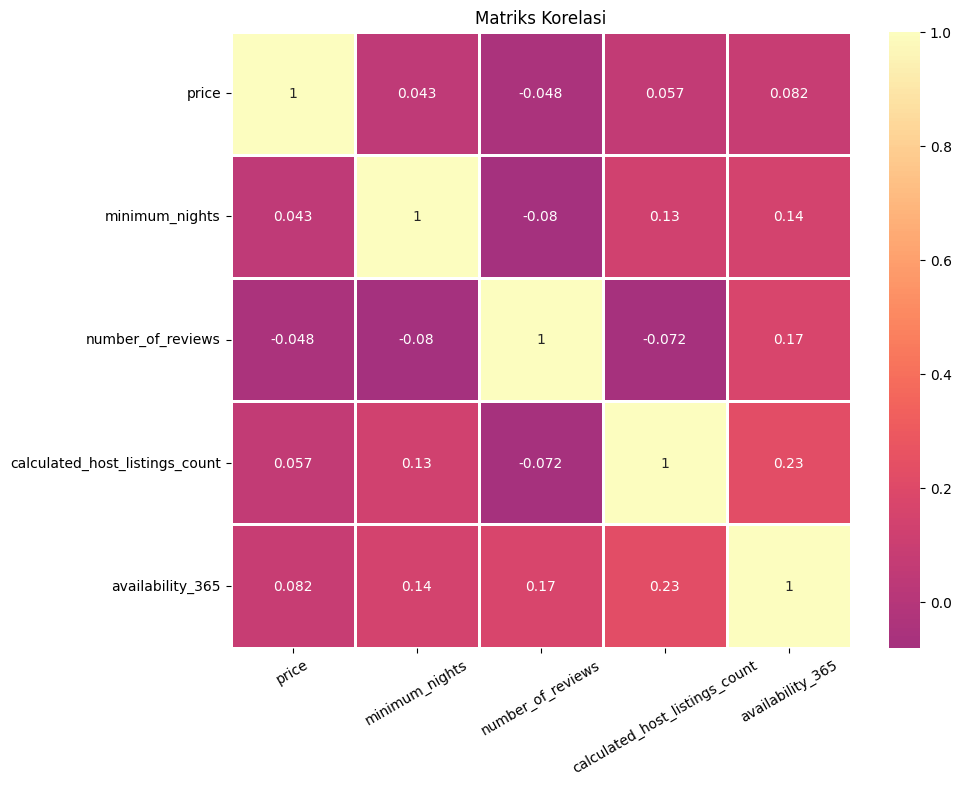

In [566]:
# Korelasi antara Variabel Numerik
corr = df_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', center=0, linewidths=1)
plt.title('Matriks Korelasi')
plt.xticks(rotation=30)
plt.show()

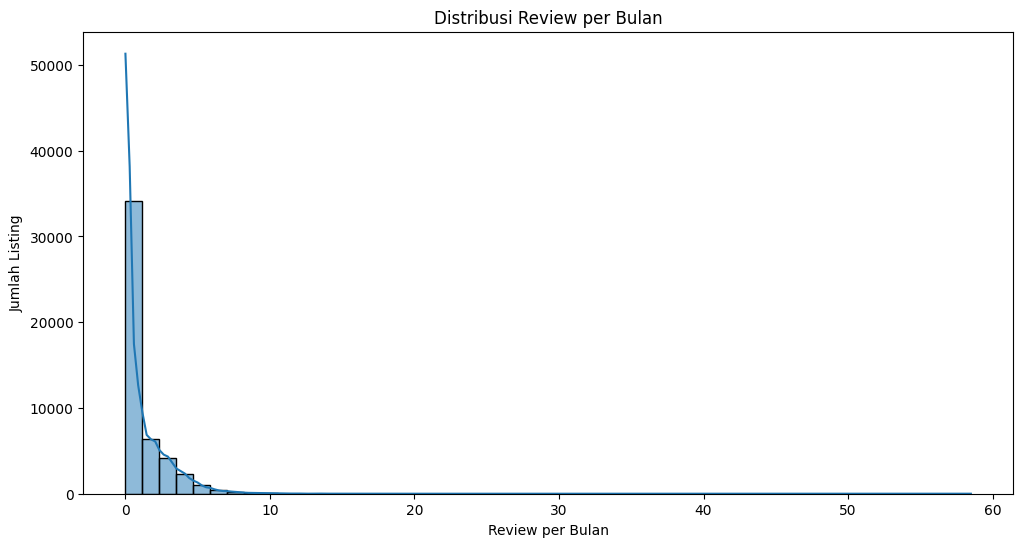

In [567]:
# Tren Review per Bulan
plt.figure(figsize=(12, 6))
sns.histplot(df_airbnb['reviews_per_month'].dropna(), bins=50, kde=True)
plt.title('Distribusi Review per Bulan')
plt.xlabel('Review per Bulan')
plt.ylabel('Jumlah Listing')
plt.show()

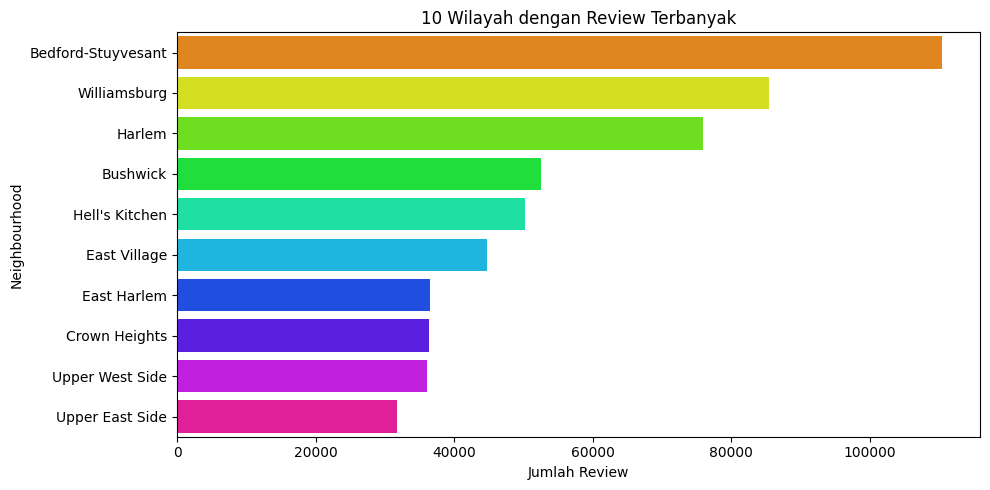

In [ ]:
# Wilayah dengan Review Terbanyak
top_areas = df_airbnb.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_areas.values, y=top_areas.index, palette=sns.color_palette('hsv', 10), hue=top_areas.index, legend=False)
plt.title('10 Wilayah dengan Review Terbanyak')
plt.xlabel('Jumlah Review')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

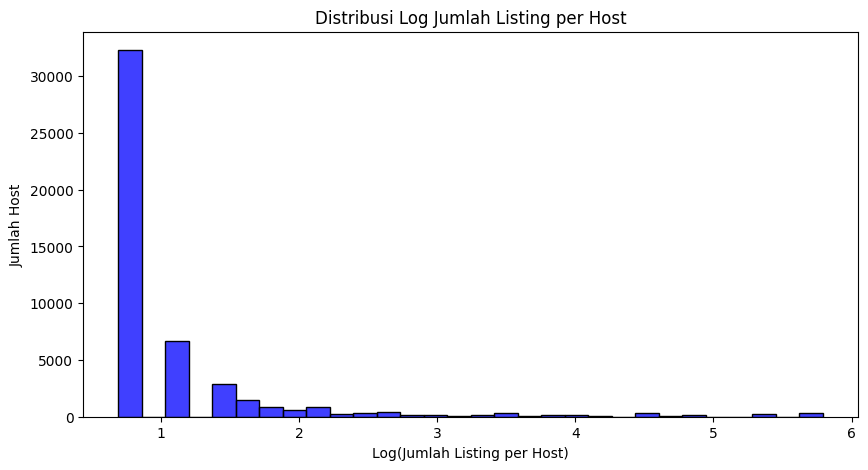

In [569]:
# Distribusi Log Jumlah Listing per Host
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df_airbnb['calculated_host_listings_count']), bins=30, color='blue')
plt.title('Distribusi Log Jumlah Listing per Host')
plt.xlabel('Log(Jumlah Listing per Host)')
plt.ylabel('Jumlah Host')
plt.show()